###### this is to analysis complaint-by-airport-csv

In [40]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean


In [3]:
df = pd.read_csv("complaints-by-airport.csv")

In [4]:
df.head(10)

,pdf_report_date,airport,year_month,count
0,2019-02,ABE,2015-01,0
1,2019-02,ABE,2015-02,0
2,2019-02,ABE,2015-03,0
3,2019-02,ABE,2015-04,0
4,2019-02,ABE,2015-05,2
5,2019-02,ABE,2015-06,1
6,2019-02,ABE,2015-07,3
7,2019-02,ABE,2015-08,0
8,2019-02,ABE,2015-09,2
9,2019-02,ABE,2015-10,5


In [5]:
print('variables with NA values\n', df.isna().sum())

variables with NA values
 pdf_report_date      0
airport            109
year_month           0
count                0
dtype: int64


In [7]:
# so only airport name has empty values.
# drop na
df = df.dropna()

In [14]:
df.groupby('airport')['count'].sum().nlargest(5)

airport
LAX    24794
JFK    24677
EWR    24405
ATL    23591
MCO    22308
Name: count, dtype: int64

In [12]:
# so let's look into 2 airports with most complaints

KeyError: ''

In [20]:
top = ['LAX','JFK']
df_top = df[df['airport'].isin(top)]

In [22]:
df_top.head()

,pdf_report_date,airport,year_month,count
20559,2019-02,JFK,2015-01,220
20560,2019-02,JFK,2015-02,127
20561,2019-02,JFK,2015-03,137
20562,2019-02,JFK,2015-04,173
20563,2019-02,JFK,2015-05,167


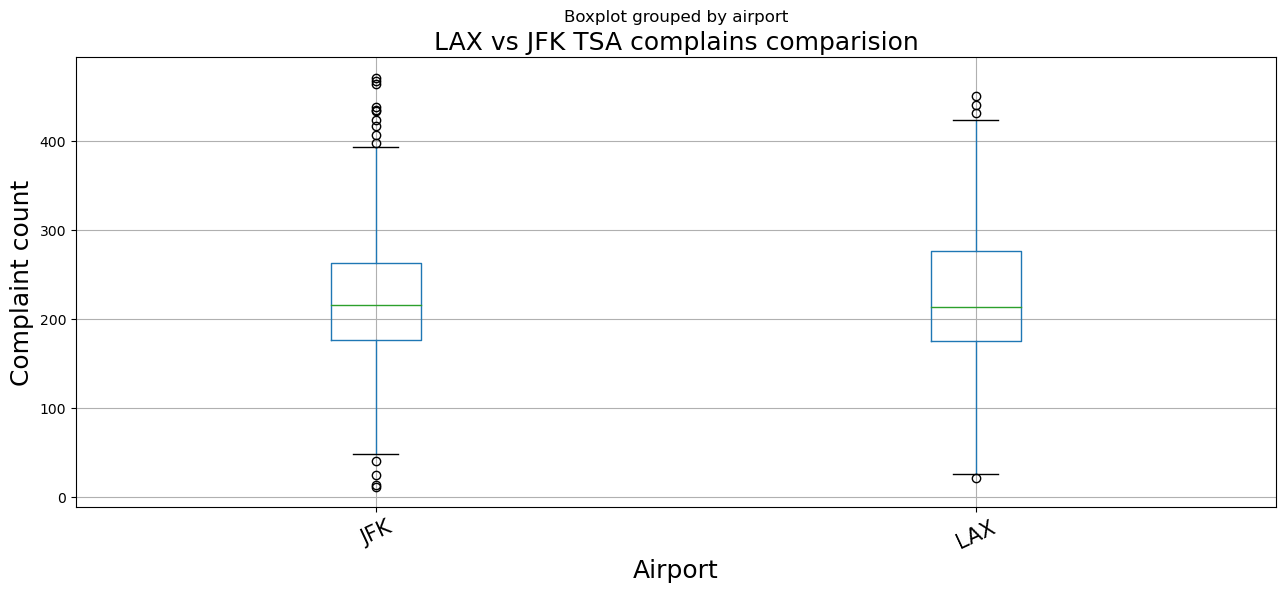

In [27]:
df_top.boxplot(column='count',by='airport',figsize=(15,6))
plt.xticks(fontsize=15)
plt.title("LAX vs JFK TSA complains comparision", fontsize =18)
plt.xlabel("Airport",fontsize=18)
plt.ylabel("Complaint count",fontsize=18)
plt.xticks(rotation = 25)
plt.show()

###### looks both airport has similar behavior in TSA complaint

In [41]:
# now look at JFK time trend
df_top['year_month'] = pd.to_datetime(df_top['year_month'])

C:\Users\Daisy\AppData\Local\Temp\ipykernel_19204\684500861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['year_month'] = pd.to_datetime(df_top['year_month'])


In [42]:
df_top.head()

,pdf_report_date,airport,year_month,count,date
20559,2019-02-01,JFK,2015-01-01,220,2019-02-01
20560,2019-02-01,JFK,2015-02-01,127,2019-02-01
20561,2019-02-01,JFK,2015-03-01,137,2019-02-01
20562,2019-02-01,JFK,2015-04-01,173,2019-02-01
20563,2019-02-01,JFK,2015-05-01,167,2019-02-01


In [43]:
df_JFK =df_top[df_top['airport']=='JFK']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


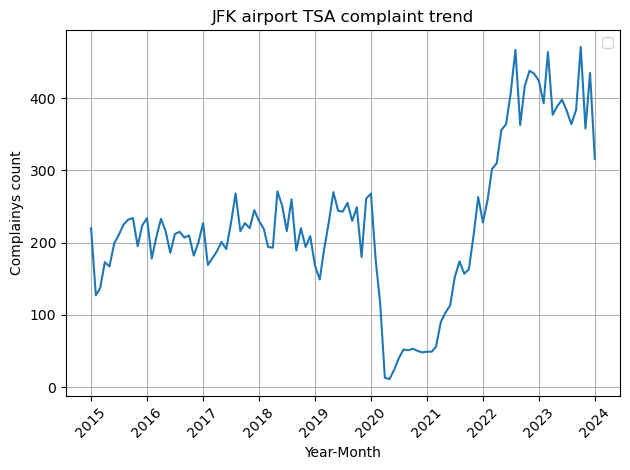

<Figure size 1800x400 with 0 Axes>

In [47]:
plt.plot(df_JFK['year_month'], df_JFK['count']) # Plot the chart
plt.title('JFK airport TSA complaint trend')
plt.xlabel('Year-Month')
plt.ylabel('Complainys count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.figure(figsize=(18, 4))
plt.show()

In [46]:
print('JFK experienced a big jump in TSA complaints since end of Covid')

JFK experienced a big jump in TSA complaints since end of Covid
